In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
labels = pd.read_csv("./data/samples.csv", index_col=0)

In [3]:
import scipy.io.wavfile
import os

inputpath = "./data" 
inputlength =  5
SR = 16000
outputlength = 4096//2
applyFFT = True

inputfiles = os.listdir(inputpath)
n_files = sum(map(lambda x: "." in x and x.split(".")[1]=="wav", inputfiles))
filelen = scipy.io.wavfile.read(inputpath + "/" + "0.wav")[1].shape[0]

recordings = np.empty((n_files, filelen, 4), dtype=np.int16)


for idx in labels.index:
    sr, data = scipy.io.wavfile.read(f"{inputpath}/{idx}.wav")
    recordings[idx,:,:] = data[:,1:5]

In [5]:
from numpy.lib.stride_tricks import sliding_window_view
normalized_recording = recordings[:,:,0]/np.max(np.abs(recordings[:,:,0]))
windowed_recording = sliding_window_view(normalized_recording**2, 10000, axis=1)
energy_per_record = np.sum(windowed_recording, axis=2)

NameError: name 'example_rec' is not defined

In [25]:
np.save("computed_energy_per_record.npy", energy_per_record)

Text(0.5, 0, 'Starttime of Window [s]')

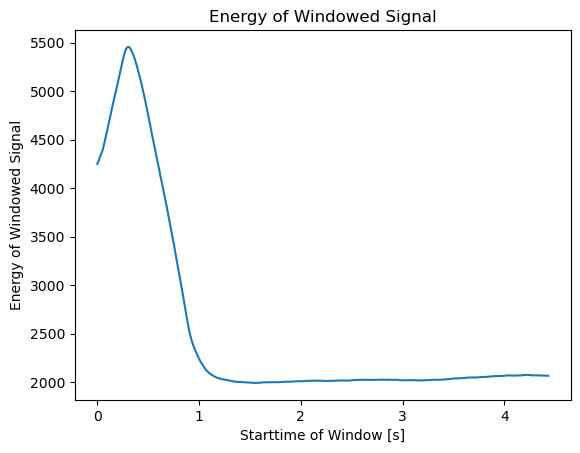

In [24]:
averaged_energy = np.average(energy_per_record, axis=0)
plt.plot(np.arange(len(averaged_energy))/16000, averaged_energy)
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

In [26]:
from numpy.lib.stride_tricks import sliding_window_view
normalized_recording = recordings[:,:,0]/np.max(np.abs(recordings[:,:,0]))
windowed_recording2 = sliding_window_view(normalized_recording**2, 1000, axis=1)
energy_per_record2 = np.sum(windowed_recording, axis=2)

Text(0.5, 0, 'Starttime of Window [s]')

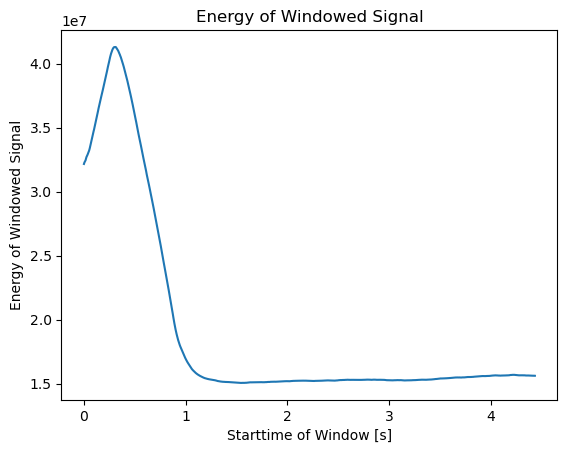

In [27]:
averaged_energy = np.average(energy_per_record2, axis=0)
plt.plot(np.arange(len(averaged_energy))/16000, averaged_energy)
plt.title("Energy of Windowed Signal")
plt.ylabel("Energy of Windowed Signal")
plt.xlabel("Starttime of Window [s]")

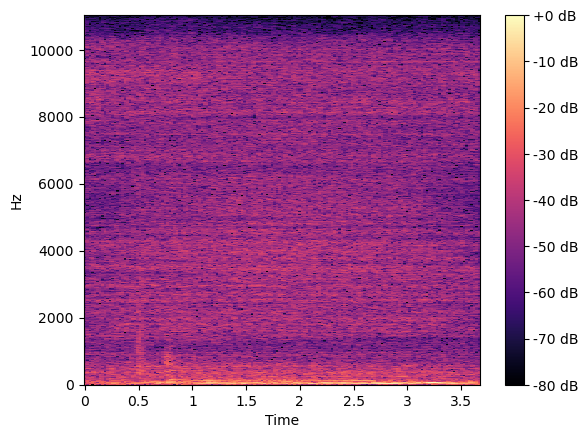

In [9]:
import librosa
D = librosa.stft(example_rec)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

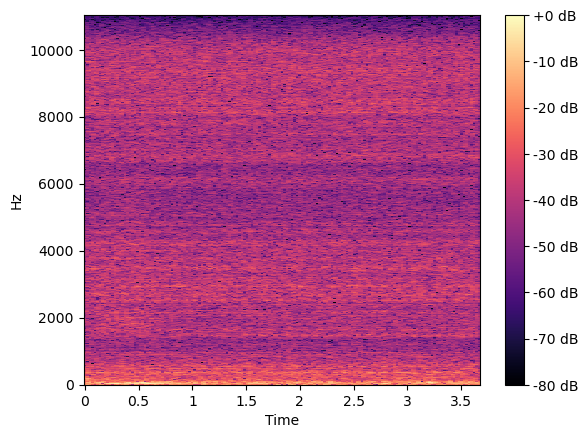

In [21]:
avg_noise = np.average(recordings[:100,:,0], axis=0)

D = librosa.stft(avg_noise)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

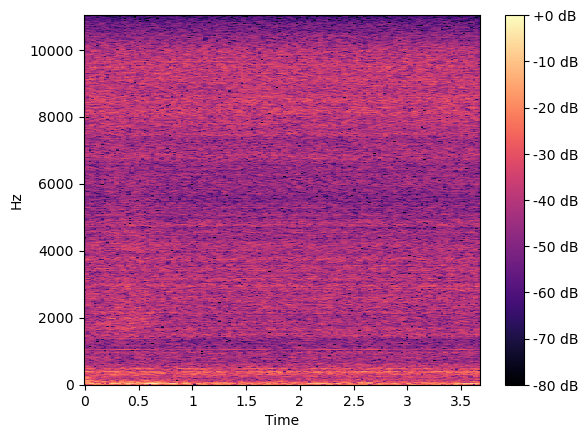

In [18]:
avg_noise = np.average(recordings[-100:,:,0], axis=0)

D = librosa.stft(avg_noise)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

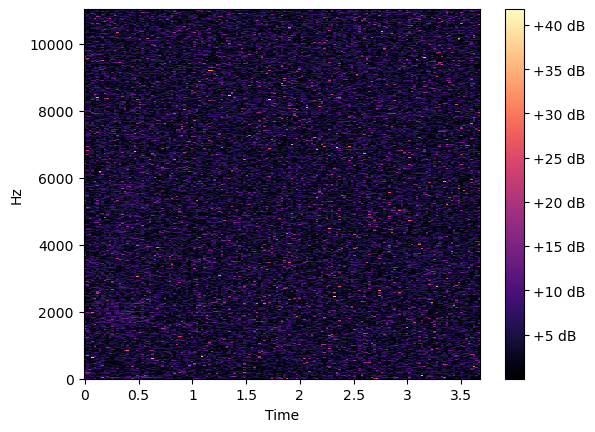

In [22]:

fig, ax = plt.subplots()
img = librosa.display.specshow(np.abs(S_db - np.average(S_db, axis=1)[:,None]), x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")

In [25]:
len(np.unique(recordings[:,:,0]))

2306

In [26]:
np.log2(2306)

np.float64(11.171176797651771)

In [30]:
energy = np.average(recordings[:,:,0]**2, axis=1)

In [31]:
grid = np.full((26,32), np.nan)
x_poses = []
for idx, row in labels.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue#
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if energy[idx] > 000:
        continue
    grid[y_pos, x_pos] = energy[idx]

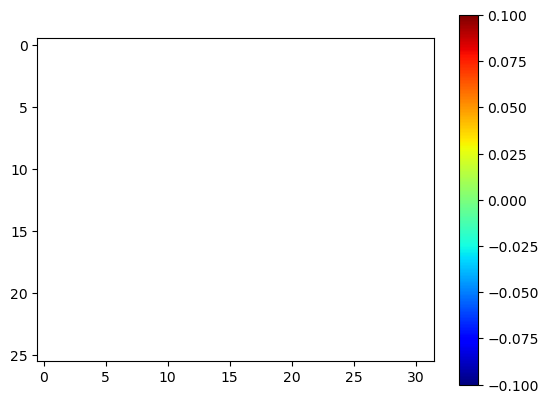

In [32]:
plt.imshow(np.log(grid), cmap="jet")
plt.colorbar()

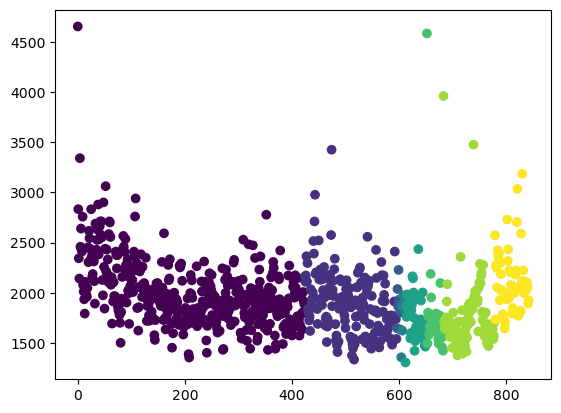

In [33]:
plt.scatter(np.arange(len(energy)), energy, c=labels.session_id)